In this notebook, we show the result of estimation of lower bound of hazard rate.

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

#from codes.UCB_discrete import M_UCB, UCB1, UCB_V, MV_LCB, Exp3, epsilon_greedy, Median_of_Means_UCB, U_UCB
from codes.Environment import Mixture_AbsGau, setup_env, Exp, est_L_test
from codes.SimulatedGames import simulate
from codes.plots import plot_hist, plot_eva

%matplotlib inline

In [3]:
# setting

num_arms = 3
est_flag = True # estimate the lower bound of hazard rate L
tau = 0.5

# environment

environments = [
    {Mixture_AbsGau: [[0, 1.5, 0,1, 1], [3.5, 2, 0, 1, 1], 
                     ],
     Exp: [[1/4]]
    } # mu1, sigma1, mu2, sigma2, p
    
]

rewards_env, quantiles, Ls, means, samples = setup_env(environments, tau)

{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 1.5, 0, 1, 1], [3.5, 2, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[0.25]]}


In [4]:
arm_name_dict = {
    0: 'A',
    1: 'B',
    2: 'C',
}

for key in quantiles.keys():
    print(key)
    quantiles[key] = list(np.around(np.array(quantiles[key]),2))
    means[key] = list(np.around(np.array(means[key]),2))
    t = PrettyTable(['Eva', 'A', 'B', 'C', 'Best Arm'])
    t.add_row([str(tau) + '-Quantile'] + quantiles[key]+ [arm_name_dict[np.argmax(quantiles[key])]])
    t.add_row(['Mean']+ means[key]+ [arm_name_dict[np.argmax(means[key])]])
    print(t)
    print()

Mixture_AbsGau_[[0, 1.5, 0, 1, 1], [3.5, 2, 0, 1, 1]]Exp_[[0.25]]
+--------------+------+------+------+----------+
|     Eva      |  A   |  B   |  C   | Best Arm |
+--------------+------+------+------+----------+
| 0.5-Quantile | 1.01 | 3.52 | 2.78 |    B     |
|     Mean     | 1.19 | 3.58 | 3.98 |    C     |
+--------------+------+------+------+----------+



## Lower bound of hazard rate estimation

Our policy and bound of expected sub-optimal draws depend on the lower bound of hazard rate. One interesting question is how well we can estimate the lower bound of hazard rate ($\hat{L}_i$), and the sensitivity of our policy to the $\hat{L}_i$. 

In [5]:
true_L_list = list(Ls.values())[0]

In [6]:
sample_size = 200
est_method = 'naive'
bandwidth = 1.145
num_exper = 100

est_L_dict = est_L_test(environments, num_exper, sample_size, est_method, bandwidth)

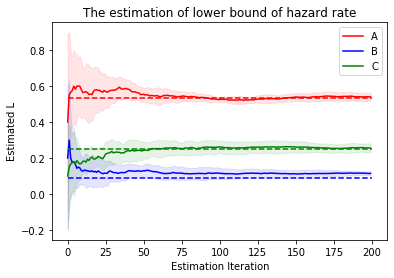

In [7]:
colors = ['red', 'blue', 'green']
        
for arm_idx, est_L_lists in est_L_dict.items():
    mean = np.mean(np.asarray(est_L_lists), axis = 0)
    std = np.std(np.asarray(est_L_lists), axis = 0)
    
    plt.plot([0, len(mean)], [true_L_list[arm_idx], true_L_list[arm_idx]], '--', color = colors[arm_idx])
    plt.plot(range(len(mean)), mean, color = colors[arm_idx], label = arm_name_dict[arm_idx])
    plt.fill_between(range(len(mean)), mean + std, mean - std, color = colors[arm_idx], alpha = 0.1)
    plt.ylabel('Estimated L')
    plt.xlabel('Estimation Iteration')
    plt.title('The estimation of lower bound of hazard rate')
    plt.legend()
    
#plt.savefig('est_L.pdf')
